<img src='http://imgur.com/1ZcRyrc.png' style='float: left; margin: 20px; height: 55px'>

# Capstone: A Lindy Hop Classifier

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
clean_open = pd.read_csv('./data/clean_open.csv')
clean_close = pd.read_csv('./data/clean_close.csv')

In [3]:
# Move to cleaning file
clean_open['person'] = clean_open['person'].map({1: 'follow', 2: 'lead'})
clean_close['person'] = clean_close['person'].map({1: 'follow', 2: 'lead'})

In [4]:
# Let's combine the dataframes for analysis
clean_open['move'] = "open"
clean_close['move'] = "closed"

merged = pd.concat([clean_open,clean_close],ignore_index=True)
follow = merged[merged["person"]=="follow"]
lead = merged[merged["person"]=="lead"]

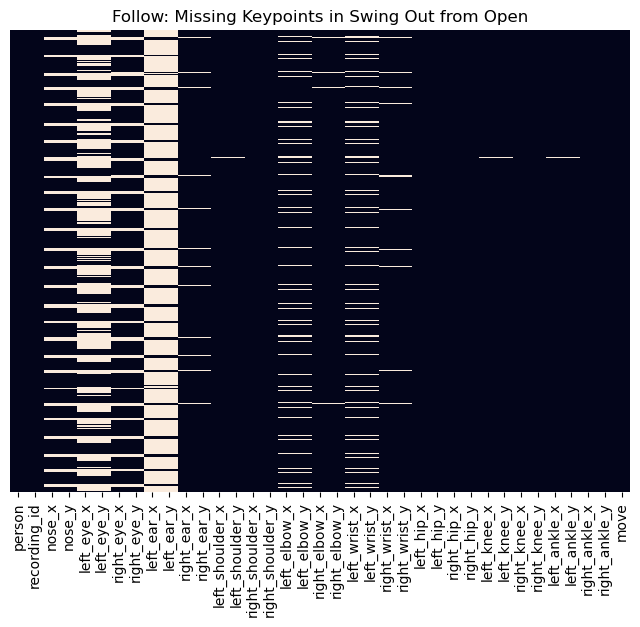

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(follow[follow['move'] == 'open'].isnull(), cbar=False, yticklabels=False)
plt.title('Follow: Missing Keypoints in Swing Out from Open')
plt.show()

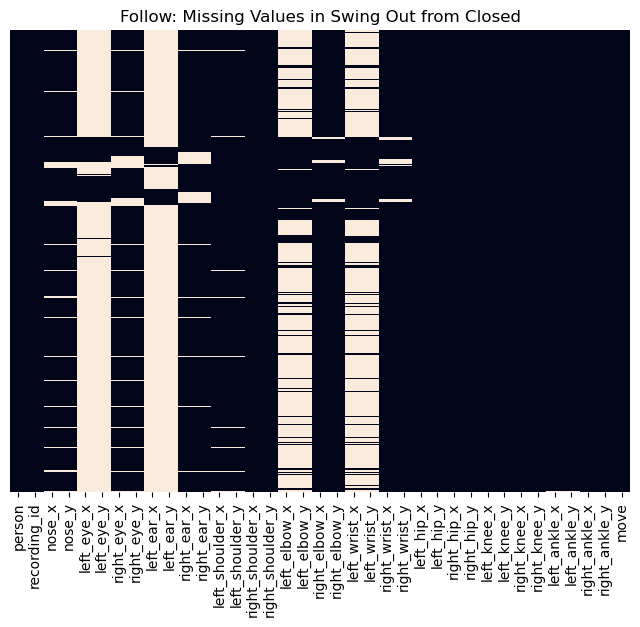

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(follow[follow['move'] == 'closed'].isnull(), cbar=False,yticklabels=False)
plt.title('Follow: Missing Values in Swing Out from Closed')
plt.show()

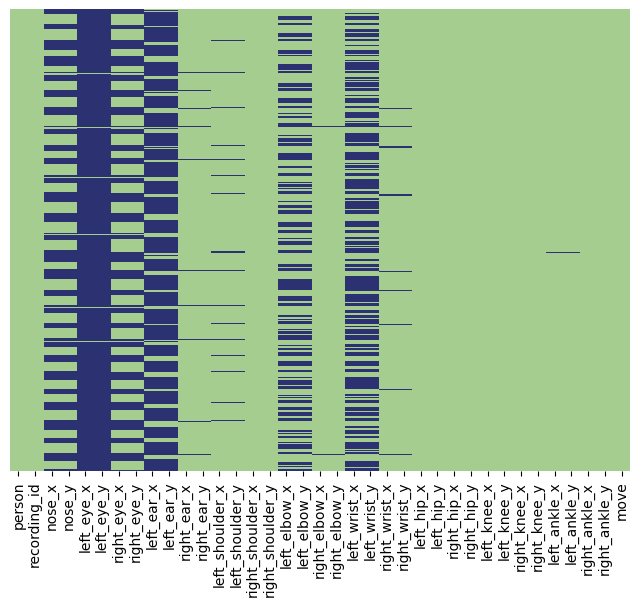

In [7]:
# Use seaborn to create a heatmap of missing values
plt.figure(figsize=(8, 6))
sns.heatmap(lead[lead['move'] == 'open'].isnull(), cbar=False, cmap="crest",yticklabels=False)
# plt.title('Lead: Missing Values in Swing Out from Open')
plt.show()

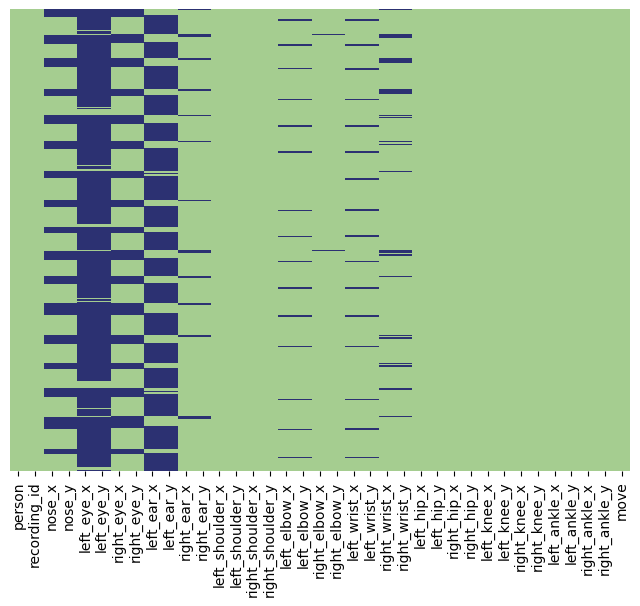

In [8]:
# Use seaborn to create a heatmap of missing values
plt.figure(figsize=(8, 6))
sns.heatmap(lead[lead['move'] == 'closed'].isnull(), cbar=False, cmap="crest",yticklabels=False)
# plt.title('Lead: Missing Values in Swing Out from Closed')
plt.show()

In [9]:
# Hypothesizing - Follow
# Open: Follow goes forward then loops back to original position - i.e. greater distance travelled
# Closed: Follow moves forward in a straight line, while changing orientation
# Fewest missing values for hips and knees; using domain knowledge, shoulder framing is important

(0.0, 1.0)

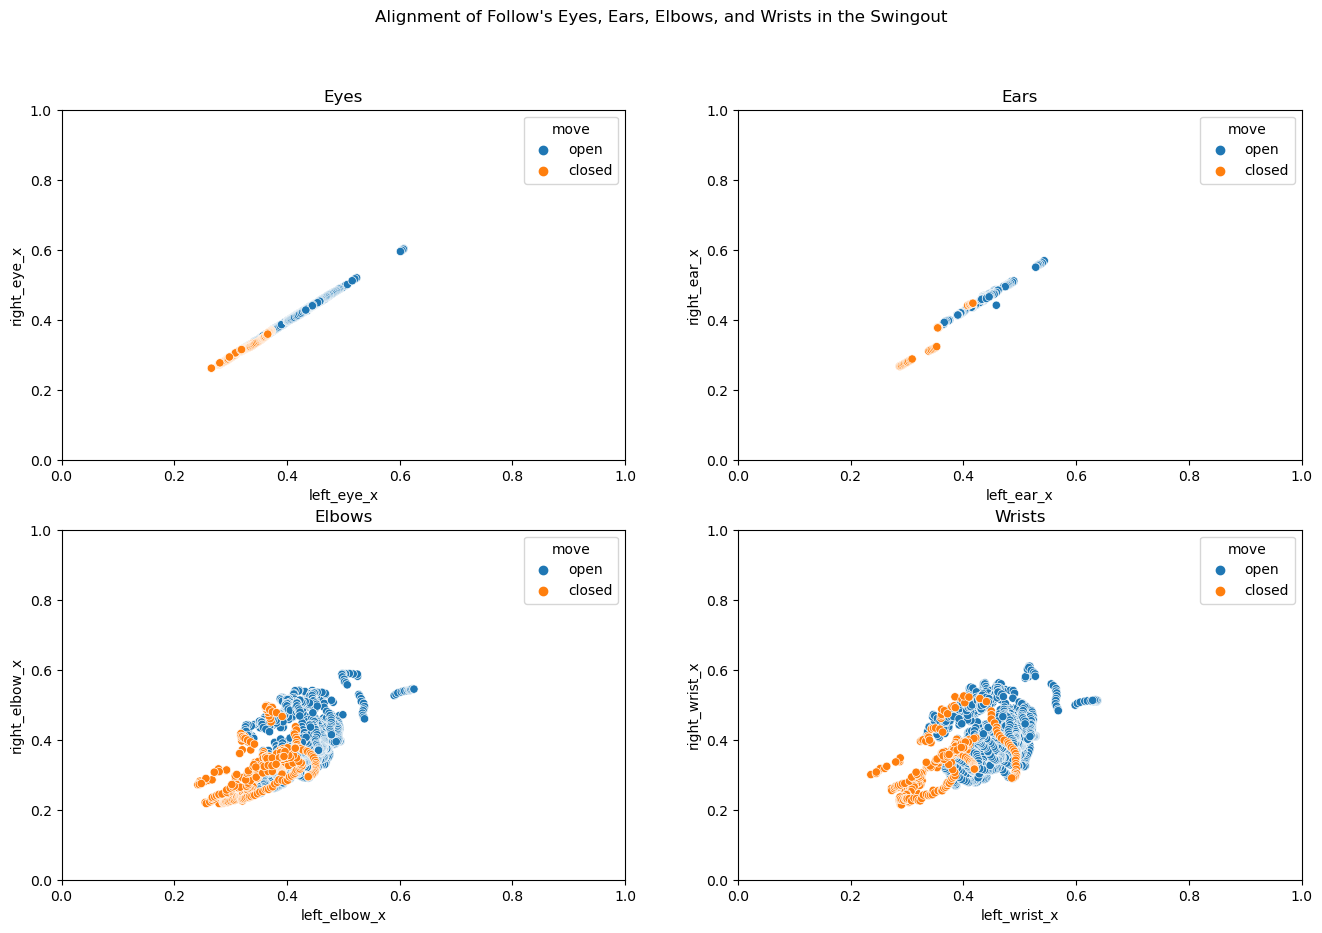

In [10]:
# Let's compare the alignment of the follow's left and right hips, knees, shoulders, ankles

fig, axes = plt.subplots(2,2, figsize=(16, 10))

fig.suptitle("Alignment of Follow's Eyes, Ears, Elbows, and Wrists in the Swingout")

sns.scatterplot(data = follow, x='left_eye_x', y = 'right_eye_x', hue='move',palette='tab10',ax=axes[0,0])
axes[0,0].set_title('Eyes')
axes[0,0].set_xlim(0, 1)
axes[0,0].set_ylim(0, 1)

sns.scatterplot(data = follow, x='left_ear_x', y = 'right_ear_x', hue='move',palette='tab10',ax=axes[0,1])
axes[0,1].set_title('Ears')
axes[0,1].set_xlim(0, 1)
axes[0,1].set_ylim(0, 1)

sns.scatterplot(data = follow, x='left_elbow_x', y = 'right_elbow_x', hue='move',palette='tab10',ax=axes[1,0])
axes[1,0].set_title('Elbows')
axes[1,0].set_xlim(0, 1)
axes[1,0].set_ylim(0, 1)

sns.scatterplot(data = follow, x='left_wrist_x', y = 'right_wrist_x', hue='move',palette='tab10',ax=axes[1,1])
axes[1,1].set_title('Wrists')
axes[1,1].set_xlim(0, 1)
axes[1,1].set_ylim(0, 1)


In [11]:
# Distinction between open and closed
# Minimal data points for facial features, some imbalance between classes for elbows and wrists

(0.15, 1.0)

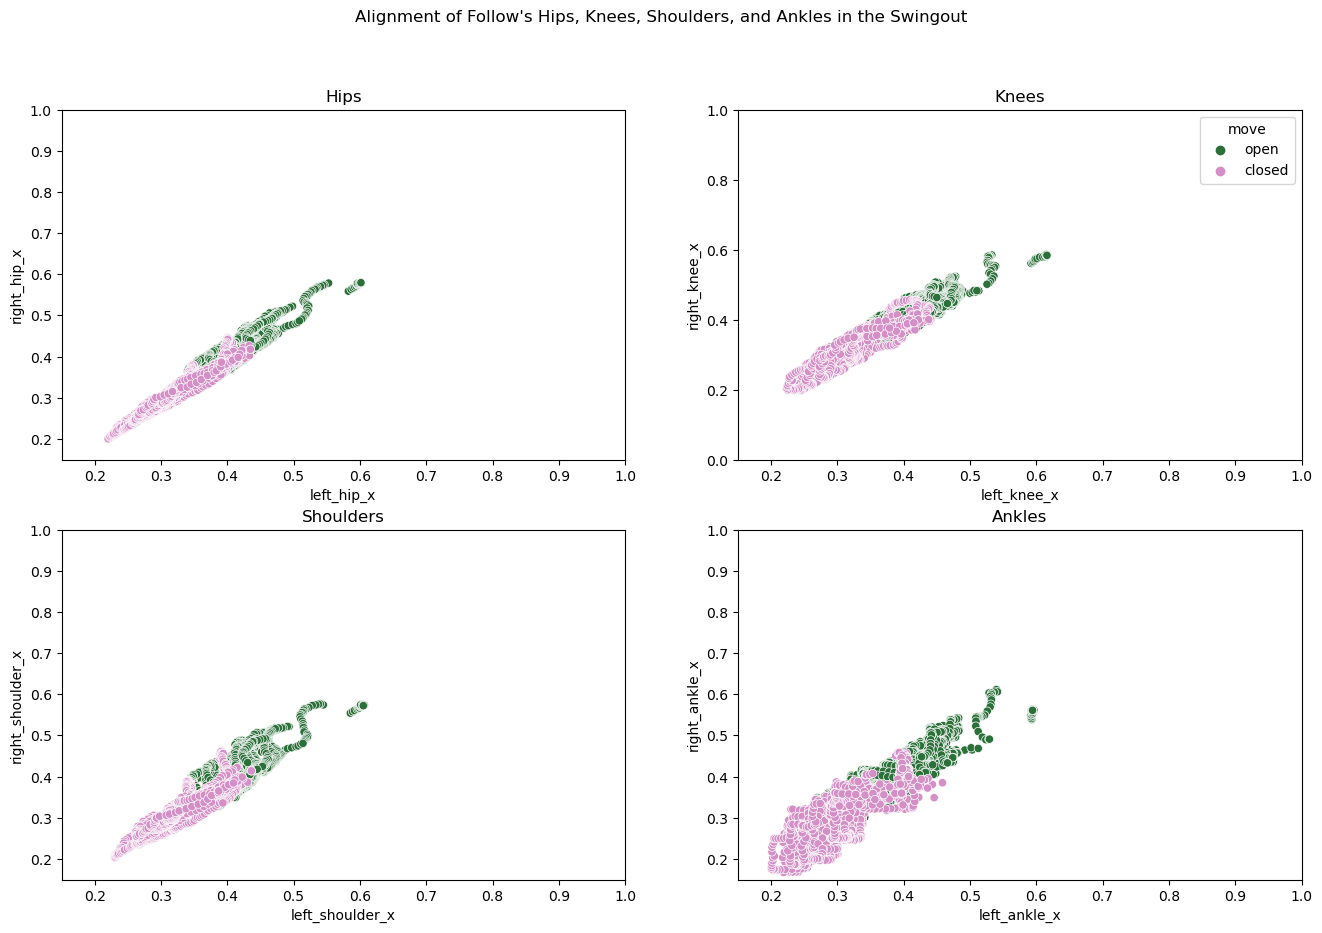

In [12]:
# Let's compare the alignment of the follow's left and right hips, knees, shoulders, ankles

fig, axes = plt.subplots(2,2, figsize=(16, 10))

fig.suptitle("Alignment of Follow's Hips, Knees, Shoulders, and Ankles in the Swingout")

sns.scatterplot(data = follow, x='left_hip_x', y = 'right_hip_x', hue='move',palette='cubehelix',ax=axes[0,0],legend=False)
axes[0,0].set_title('Hips')
axes[0,0].set_xlim(0.15, 1)
axes[0,0].set_ylim(0.15, 1)

sns.scatterplot(data = follow, x='left_knee_x', y = 'right_knee_x', hue='move',palette='cubehelix',ax=axes[0,1])
axes[0,1].set_title('Knees')
axes[0,1].set_xlim(0.15, 1)
axes[0,1].set_ylim(0, 1)

sns.scatterplot(data = follow, x='left_shoulder_x', y = 'right_shoulder_x', hue='move',palette='cubehelix',ax=axes[1,0], legend=False)
axes[1,0].set_title('Shoulders')
axes[1,0].set_xlim(0.15, 1)
axes[1,0].set_ylim(0.15, 1)

sns.scatterplot(data = follow, x='left_ankle_x', y = 'right_ankle_x', hue='move',palette='cubehelix',ax=axes[1,1], legend=False)
axes[1,1].set_title('Ankles')
axes[1,1].set_xlim(0.15, 1)
axes[1,1].set_ylim(0.15, 1)


In [13]:
# Chosen to plot the x coordinates for each keypoint
# As the swingout is captured linearly, a steep or flat gradient mean high distance between left and right 
# X-coords are generally lower for closed position than open

In [14]:
# Hypothesizing - Lead
# Open and Closed: Lead is moving rotationally around almost the same spot
# There may be more movement in open due to the stretch at the start and end of the swingout
# In close, the lead may be partially occluded, especially right shoulder, hip, and ankle - as seen by fewer data points

(0.0, 1.0)

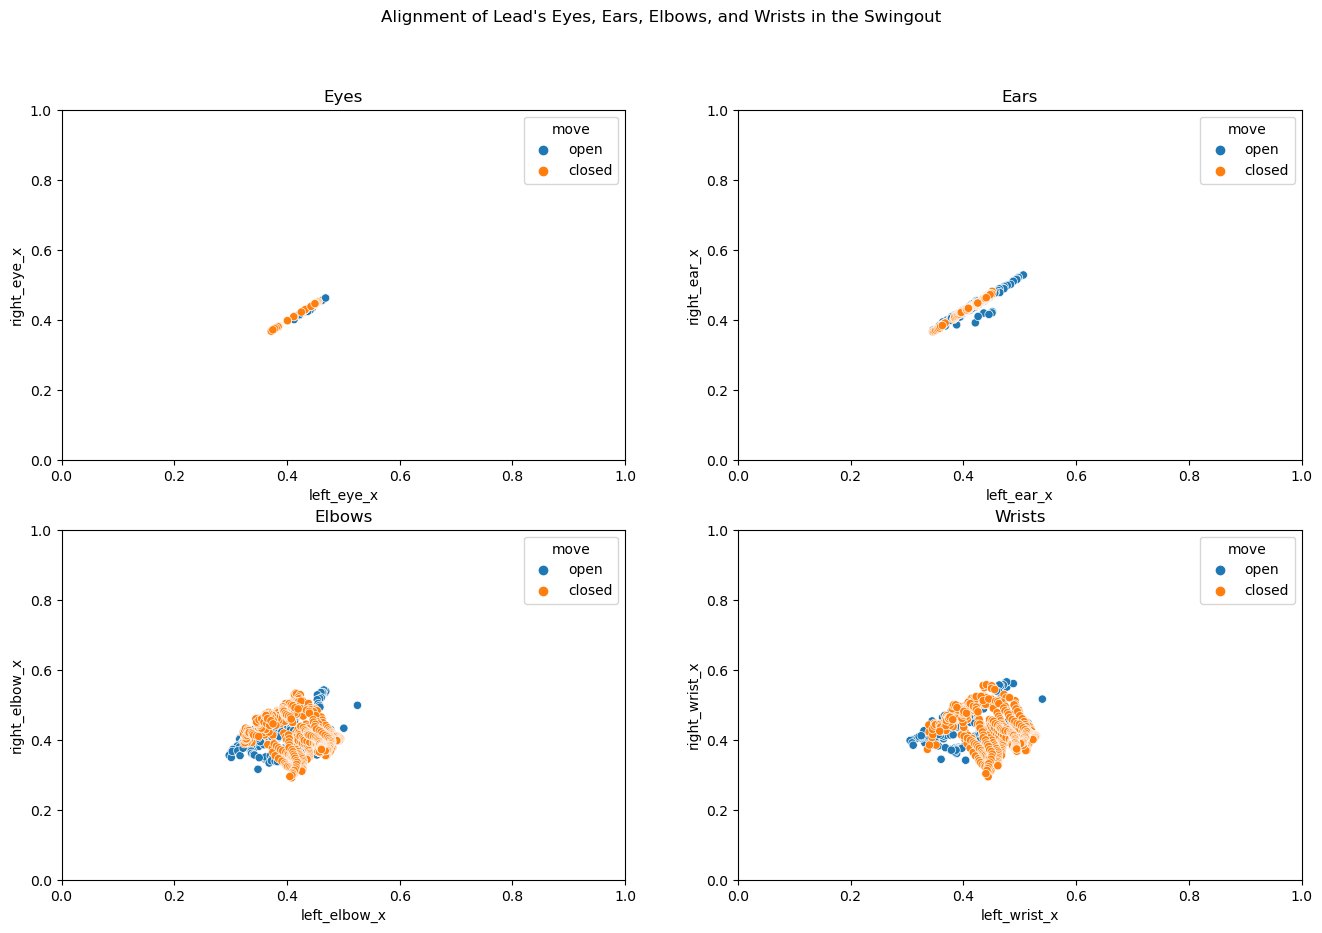

In [15]:
# Let's compare the alignment of the follow's left and right hips, knees, shoulders, ankles

fig, axes = plt.subplots(2,2, figsize=(16, 10))

fig.suptitle("Alignment of Lead's Eyes, Ears, Elbows, and Wrists in the Swingout")

sns.scatterplot(data = lead, x='left_eye_x', y = 'right_eye_x', hue='move',palette='tab10',ax=axes[0,0])
axes[0,0].set_title('Eyes')
axes[0,0].set_xlim(0, 1)
axes[0,0].set_ylim(0, 1)

sns.scatterplot(data = lead, x='left_ear_x', y = 'right_ear_x', hue='move',palette='tab10',ax=axes[0,1])
axes[0,1].set_title('Ears')
axes[0,1].set_xlim(0, 1)
axes[0,1].set_ylim(0, 1)

sns.scatterplot(data = lead, x='left_elbow_x', y = 'right_elbow_x', hue='move',palette='tab10',ax=axes[1,0])
axes[1,0].set_title('Elbows')
axes[1,0].set_xlim(0, 1)
axes[1,0].set_ylim(0, 1)

sns.scatterplot(data = lead, x='left_wrist_x', y = 'right_wrist_x', hue='move',palette='tab10',ax=axes[1,1])
axes[1,1].set_title('Wrists')
axes[1,1].set_xlim(0, 1)
axes[1,1].set_ylim(0, 1)

(0.0, 1.0)

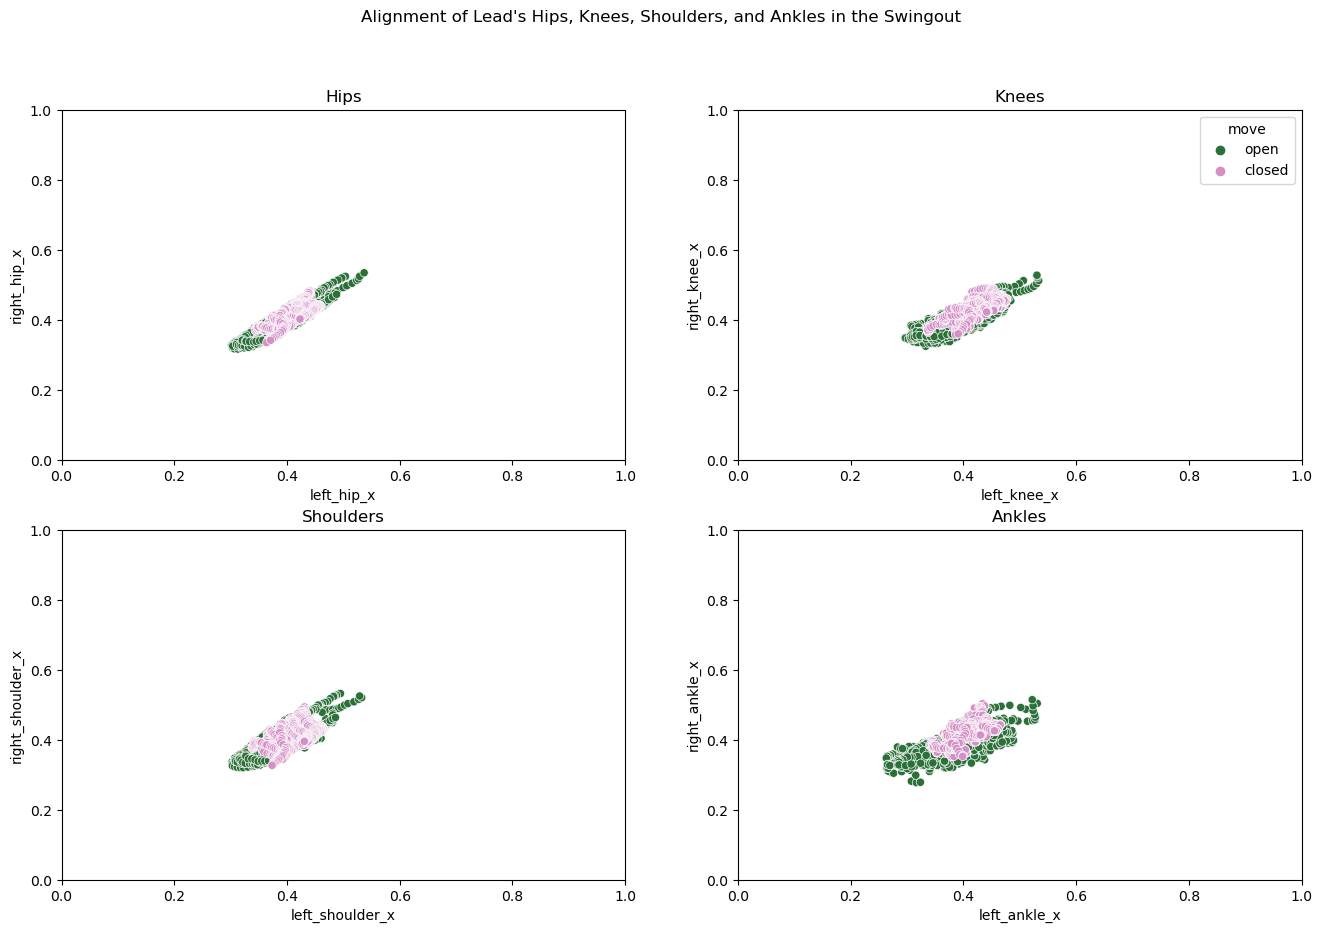

In [16]:
fig, axes = plt.subplots(2,2, figsize=(16, 10))

fig.suptitle("Alignment of Lead's Hips, Knees, Shoulders, and Ankles in the Swingout")

sns.scatterplot(data = lead, x='left_hip_x', y = 'right_hip_x', hue='move', palette = "cubehelix", ax=axes[0,0],legend=False)
axes[0,0].set_title('Hips')
axes[0,0].set_xlim(0, 1)
axes[0,0].set_ylim(0, 1)

sns.scatterplot(data = lead, x='left_knee_x', y = 'right_knee_x', hue='move',palette='cubehelix',ax=axes[0,1])
axes[0,1].set_title('Knees')
axes[0,1].set_xlim(0, 1)
axes[0,1].set_ylim(0, 1)

sns.scatterplot(data = lead, x='left_shoulder_x', y = 'right_shoulder_x', hue='move',palette='cubehelix',ax=axes[1,0],legend=False)
axes[1,0].set_title('Shoulders')
axes[1,0].set_xlim(0, 1)
axes[1,0].set_ylim(0, 1)

sns.scatterplot(data = lead, x='left_ankle_x', y = 'right_ankle_x', hue='move',palette='cubehelix',ax=axes[1,1],legend=False)
axes[1,1].set_title('Ankles')
axes[1,1].set_xlim(0, 1)
axes[1,1].set_ylim(0, 1)


In [17]:
# There is a lot of overlap, where the closed position is found within the open position
# We may exclude the lead from the modeling

In [18]:
merged = merged.fillna(0)

In [19]:
merged.to_csv("merged.csv",index=False)